# Practical 8: Pandas to Cluster Analysis

<div class="alert alert-block alert-success">
<b>Objectives:</b> In this practical we keep moving with applied demonstrations of modules you can use in Python. Today we continue to practice using Pandas, but also start applying some common machine learning techniques. Specifically, we will use Cluster Analysis [also known as unsupervised machine learning] to study distinct groupings on two very different datasets.
    
For the first challenge, we are going to be working with a dataset from the UC Irvine Machine Learning repository on forest fires. This dataset, saved as a <code> .csv </code> file, is taken from the study:
[Cortez and Morais, 2007] P. Cortez and A. Morais. A Data Mining Approach to Predict Forest Fires using Meteorological Data. In J. Neves, M. F. Santos and J. Machado Eds., New Trends in Artificial Intelligence, Proceedings of the 13th EPIA 2007 - Portuguese Conference on Artificial Intelligence, December, Guimarães, Portugal, pp. 512-523, 2007. APPIA, ISBN-13 978-989-95618-0-9.*

For the second dataset will be looking at categorical data from listings in New York through Air BnB data extracted from the [Kaggle platform](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data).

The notebook is split according to the following activities.
    
 - 1) [Introduction to Cluster Analysis](#Part1)
      * [Exercise 1: Plot a histogram of meteorological variables and fire extent](#sExercise1)
      * [Exercise 2: Produce a correlation coefficient matrix](#Exercise2)
      * [Exercise 3: Create new dataframe with only positive values of fire area and repeat cluster analysis](#Exercise3)
 - 3) [Working with 'other' data ](#Part2)
      * [Exercise 4: Clustering AirBnB data from New York](#Exercise4)
      * [Exercise 5: Visualise cluster data by room type](#Exercise5)
 
As with our other notebooks, we will provide you with a template for plotting the results. Also please note that you should not feel pressured to complete every exercise in class. These practicals are designed for you to take outside of class and continue working on them. Proposed solutions to all exercises can be found in the 'Solutions' folder.
</div>

### Introduction to Cluster Analysis <a name="Part1"></a>

Machine learning is all the rage these days. One branch of machine learning are a family of algorithms known as unsupervised methods. These attempt to extract patterns from a dataset according to a number of assumptions. Cluster Analysis is a subset of such methods, and used across the sciences. An excellent overview of some of the challenges is given in the documentation of a method known as [HDBSCAN](https://hdbscan.readthedocs.io/en/latest/comparing_clustering_algorithms.html)

>> There are a lot of clustering algorithms to choose from. The standard sklearn clustering suite has thirteen different clustering classes alone. So what clustering algorithms should you be using? As with every question in data science and machine learning it depends on your data. A number of those thirteen classes in sklearn are specialised for certain tasks (such as co-clustering and bi-clustering, or clustering features instead data points). Obviously an algorithm specializing in text clustering is going to be the right choice for clustering text data, and other algorithms specialize in other specific kinds of data. Thus, if you know enough about your data, you can narrow down on the clustering algorithm that best suits that kind of data, or the sorts of important properties your data has, or the sorts of clustering you need done. 

We are going to use the K-means method for clustering. K-means is perhaps one of the most simplest methods for clustering and, whilst fast and also a distance based method, has limitations when dealing with complex datasets. If you are interested you can find some excellent tutorials and examples on the official [Scikit-learn webpage](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) !

<img src="images/sphx_glr_plot_kmeans_assumptions_001.png" alt="Numpy array indexing" style="width: 600px;"/>


Before we jump into using K-means, we need to try and understand our, data as per the above discussion. 


In [1]:
import pandas as pd #Im using pd here as its easier to keep writing! You can use whatever you want, but it might help you to use 'pd' for now.
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
# Read data from file 
# We are going to use the function 'read_csv' within the Pandas package:

if 'google.colab' in str(get_ipython()):
    data = pd.read_csv('https://raw.githubusercontent.com/loftytopping/DEES_programming_course/master/data/forestfires.csv')
    data.head()
else:
    data = pd.read_csv("data/forestfires.csv") 
    data.head()

# Notice how we call that function using the '.' operator?
# (Note the data file needs to be in the same directory that your jupyter notebook is based) You can control delimiters, rows, column names with read_csv (see later) 

# How do we preview the data file.
# Preview the first 5 lines of the loaded data 
data.head()
#data.columns.values

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


<div class="alert alert-block alert-success">
<b> Exercise 1: Plot a histogram of meteorological variables and fire extent. <a name="Exercise1"></a>  </b> The purpose of this exercise is to understand our dataset a little before we start to apply any cluster analysis. We will discuss the reason for this as we apply cluster analysis. For the meteorological variables you need to produce a histogram for:
    
 - 'temp': Temperature
 - 'RH' : Relative Humidity
 - 'wind': Wind speed
 - 'Rain': Rainfall 
 
Rather than produce one 'big' plot for each I have provided you with the code for creating a tile of subplots. This looks like the following:

```python
# Import Matplotlib for plotting
import matplotlib.pyplot as plt

# This command assigns variables for the entire figure and axes that are distributed over the figure space according to the number of rows and columns in the parentheses. I also specify a figure size and tell Matplotlib I dont want each plot to share the same y-axes scale [sharey=False]
fig, axs = plt.subplots(2, 3, figsize=(12, 8), sharey=False)
# Create a histogram for the varible 'temp'. The command ax=axs[0,0] tells Matplotlib to focus on the axes 'ax' using the index assigned earlier.
data.hist(column='temp',ax=axs[0,0])
```

When you you have finished the code for the other variables, you figure should look like the following figure:

![](images/Practical8_example.png) 

<div class="alert alert-block alert-warning">
<b>Please note:</b> For each histogram you will need to change the values within the command:

```python
ax=axs[0,0]
```
where the first value indicates the row, and the second the column value.

</div>

</div>


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a1a170790>],
      dtype=object)

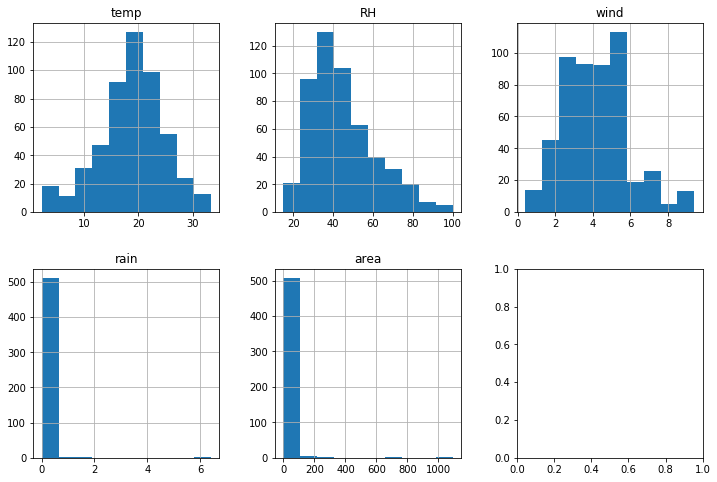

In [2]:
# Make a boxplot for each column. We could group them into one figure but this is beyond the scope of this practical. 
# In the template below I have given you a template to include a boxplot in each subplot
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 3, figsize=(12, 8), sharey=False)
# Temperature
data.hist(column='temp',ax=axs[0,0])
#------'INSERT CODE HERE'------
# RH
data.hist(column='RH',ax=axs[0,1])
# Wind
data.hist(column='wind',ax=axs[0,2])
# Rain
data.hist(column='rain',ax=axs[1,0])
# Fire area
data.hist(column='area',ax=axs[1,1])
#------------------------------

For the first three variables, we can easily infer a distribution of values. For the final two variables, however, the distribution is much harder to interpret due to a very high number of small values. Given that we are interested in forest fires, we need to consider whether this might influence our clustering. Why is that? If we are using the values of each variable to calculate a 'distance' between each observation, a variable that has a very large range relative to others might dominate the clustering.  

<div class="alert alert-block alert-success">
<b> Exercise 2: Produce a correlation coefficient matrix <a name="Exercise2"></a>  </b> Now you are tasked with producing a heatmap of correlation coefficients between the meteorological variables and fire extent. In the code snippet below I have imported the seaborn library used to produce the heatmap. For the rest of the code, you might want to revisit the example in Practical 7.

When you you have finished the code for the other variables, you figure should look like the following:

![](images/Practical8_corr.png) 

</div>



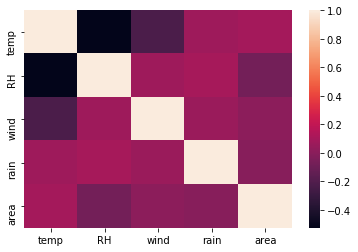

In [2]:
import seaborn as sns
# calculate the correlation matrix
#------'INSERT CODE HERE'------
corr = data[['temp','RH','wind','rain','area']].corr()
# Now use an internal function within Seaborn called '.heatmap'
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)
#------------------------------
# And we now need to show the plot.
plt.show()

###  K-means cluster analysis

K-means cluster analysis is perhaps the simplest of all, but allows us to practice turning a dataset into one that contains a different number of clusters, members of which should have 'similar' properties. How we define the similarity between members can vary widely. Take the following [figure](https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html):

![](images/Practical_8_blue_kmeans.png ) 

For this hypothetical 2D dataset, we can perhaps confidently calculate the correct number of clusters as 4. But, what if we simply dont know how many clusters we need or can't easily visualise all of the dimensions in our dataset? For our dataset, we can at least specify a number of clusrers and then visualise the properties of said clusters.  

In the following code snippet we perform a number of steps to label each observation [row in our dataset] as belonging to a particular cluster. The label is an integer value, and the distinction between clusters will be performed on the values of temperature, humidity and fire area. These steps are as follows:

<div class="alert alert-block alert-info">
    
 - Extract our variables of interest from the dataframe into a new Numpy matrix
    
 - Specify how many clusters we want the Kmeans algorithm to find
 
 - Fit the clustering algorithm to our Numpy matrix
 
 - Extract the labels to which each row in our matrix has been assigned.
</div>





In [3]:
from sklearn.cluster import KMeans
# Extract our variables of interest from the dataframe into a new Numpy matrix
numpy_matrix = data[['temp','RH','area']].values
# Specify how many clusters we want the Kmeans algorithm to find
clusterer=KMeans(n_clusters=4)
# Fit the clustering algorithm to our Numpy matrix
clusterer.fit(numpy_matrix)
# Extract the labels to which each row in our matrix has been assigned.
labels = clusterer.labels_

# In the dataframe 'data' we can store the labels from using K-means:
data['K-means label'] = labels
# For example the following simply prints the new dataframe column to the screen
data['K-means label']

0      3
1      0
2      0
3      3
4      3
      ..
512    0
513    3
514    3
515    0
516    0
Name: K-means label, Length: 517, dtype: int32

Now let us look at the properties of these clusters by generating box-plots of values from our dataframe. We have already met multiple functions that can be applied to our dataframe. In Practical 7 we briefly produced box-plots of our dataframe using the:

```python
<<name of dataframe>>.boxplot(column=[<<names of columns>>])
```

command. We can also select a subset of values in the columns by asking the <code> boxplot </code> function to distinguish by a value found in a specific column. In the example below we expand the boxplot function to select values by K-means label through, for example:

```python
data.boxplot(column=['temp'], by=['K-means label'], ax=ax[0])
```
In this case we are asking Python to produce a boxplot of values in the column <code> temp </code> but also produce a number of seperate boxplots according the number of unique values given by the column <code> K-means label </code>.

Please check the following code snippet and then the box-plots. Do the collected properties of the different clusters allow you to distinguish between them? Do they 'look' different?

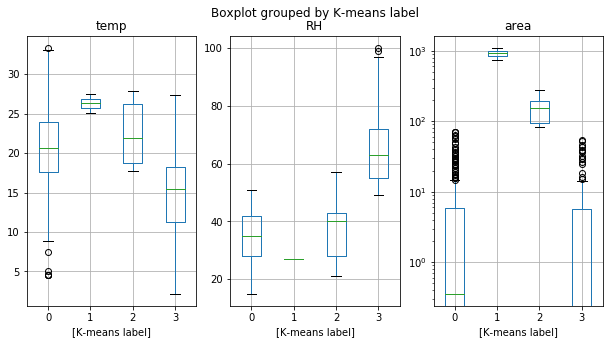

In [4]:
fig, ax = plt.subplots(1, 3, figsize=(10, 5))
data.boxplot(column=['temp'], by=['K-means label'], ax=ax[0])
data.boxplot(column=['RH'], by=['K-means label'], ax=ax[1])
data.boxplot(column=['area'], by=['K-means label'], ax=ax[2]).set_yscale('log')


<div class="alert alert-block alert-success">
<b> Exercise 3: Create new dataframe with only positive values of fire area and repeat the above cluster analysis <a name="Exercise3"></a>  </b> 
    
In this exercise you can copy the above code example, but you need to ensure operations are performed on a new set of datapoints from a new dataframe. Can you remember how we select a new dataframe according to some criteria on the values we want to work with? For example, if we wanted to create a new dataframe based on all values of <code> area </code> greater than 10, we might write:

```python
new_dataframe = data[data["area"] > 10.0]
```

In this exercise, you are asked to specify that the fire area should be positive. Once you have completed the code, you should arrive at the following figure:

![](images/Practical_8_ex2.png) 

Please note the ordering may be different, but this is normal. 
    
</div>


C:\Users\Dave\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


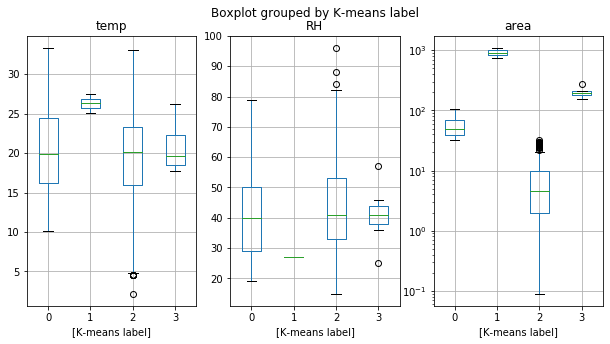

In [6]:
#-------'INSERT CODE HERE'-------
data_new = data[data["area"] > 0]
numpy_matrix_new = data_new[['temp','RH','area']].values
clusterer=KMeans(n_clusters=4)
clusterer.fit(numpy_matrix_new)
labels = clusterer.labels_
data_new['K-means label'] = labels
#--------------------------------


data_new['K-means label']
#data['Operator'].value_counts().plot(kind='bar')
fig, ax = plt.subplots(1, 3, figsize=(10, 5))
data_new.boxplot(column=['temp'], by=['K-means label'], ax=ax[0])
data_new.boxplot(column=['RH'], by=['K-means label'], ax=ax[1])
data_new.boxplot(column=['area'], by=['K-means label'], ax=ax[2]).set_yscale('log')


## Working with 'other' data <a name="Part2"></a>

In the following code box we load some freely available data on Air BnB listings from New York in 2019. By previewing our column names, you can see we have a collection of both numeric and non-numerical data. Why might cluster analysis be of use here? Let's see if we can assign each available entry into distinct groups, again using K-means cluster analysis.


In [7]:
# Load the Air BnB data

if 'google.colab' in str(get_ipython()):
    data_NYC = pd.read_csv('https://raw.githubusercontent.com/loftytopping/DEES_programming_course/master/data/AB_NYC_2019.csv')
    data_NYC.head()
else:
    data_NYC = pd.read_csv("data/AB_NYC_2019.csv") 
    data_NYC.head()

# Preview the first 5 lines of the loaded data 
data_NYC.head()
#data_NYC.columns.values

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


For example, we can see there is a variable that reflects the neighborhood group of the listings. Let us say we wish to see how many unique entries there are. Rather than repeating the calculation we have done a number of times, we can produce a bar plot that automatically places each unique entry on the <code> x </code> axis, and the number of times this occurs on the <code> y </code> axis.

The command for this is:

```python
dataframe['column name'].values_counts().plot(kind='bar')
```

In English, this command is asking Python to focus on data from the column named <code> column name </code>, extract the unique entries and calculate their frequency, then show me this information as a bar plot.

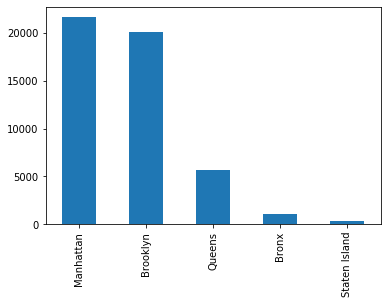

In [8]:
data_NYC['neighbourhood_group'].value_counts().plot(kind='bar')

<div class="alert alert-block alert-success">
<b> Exercise 4: Clustering AirBnB data from New York by lattitude, longitude and price <a name="Exercise4"></a>  </b> 
   
We want to cluster this dataset in order to determine the properties of similar listings. For this exercise, as this is a different dataset, let us repeat the procedure of using the K-means algorithm to produce 4 clusters by focusing on the variables <code> latitude </code>, <code> longitude </code> and <code> price </code>. Produce a boxplot of the results, grouped by cluster label, for the price only.

When you you have finished the code for the other variables, you figure should look like the following:

![](images/Practical_8_ex5.png) 

</div>



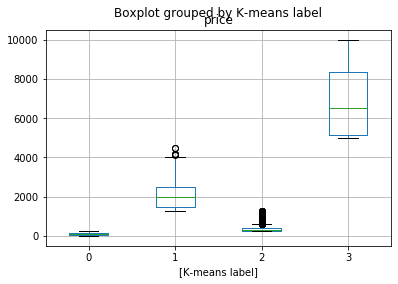

In [9]:
#-------'INSERT CODE HERE'-------
numpy_matrix_NYC = data_NYC[['latitude', 'longitude', 'price']].values
model_NYC = KMeans(n_clusters=4)
model_NYC.fit(numpy_matrix_NYC)
labels = model_NYC.labels_
#------------------------------
data_NYC['K-means label'] = labels
data_NYC.boxplot(column=['price'], by=['K-means label'])

Ideally we would also like to get a feel for the ratio of each neighborhood in each cluster. We can certainly do that by producing 4 seperate barcharts as per the code box below. In this code snippet I'm expanding on the previous example of a barchart by selecting a subset according to the value of the K-means cluster label:

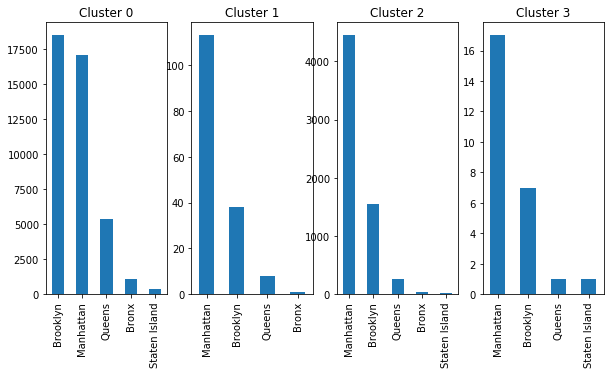

In [10]:
fig, axes = plt.subplots(1, 4, figsize=(10, 5))

# Produce 4 seperate plots
data_NYC[data_NYC['K-means label']==0]['neighbourhood_group'].value_counts().plot(kind='bar', title='Cluster 0', ax=axes[0])
data_NYC[data_NYC['K-means label']==1]['neighbourhood_group'].value_counts().plot(kind='bar', title='Cluster 1', ax=axes[1])
data_NYC[data_NYC['K-means label']==2]['neighbourhood_group'].value_counts().plot(kind='bar', title='Cluster 2', ax=axes[2])
data_NYC[data_NYC['K-means label']==3]['neighbourhood_group'].value_counts().plot(kind='bar', title='Cluster 3', ax=axes[3])

What does this graph tell us? The median price of Cluster '1' is high, and these results confirm those listings are dominated by properties in Manhattan. However, there appears to be a very similar profile in Cluster '2' which has a much lower median price range. 

<div class="alert alert-block alert-success">
<b> Exercise 5: Visualise cluster data by room type <a name="Exercise5"></a>  </b> 
   
In the following exercise, reproduce the above plot for the variable <code> room_type </code>. Your results should look like the following figure:

![](images/Practical_8_ex6.png) 

</div>


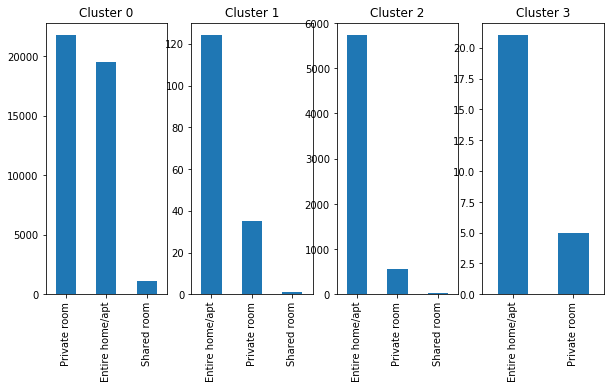

In [11]:
fig, axes = plt.subplots(1, 4, figsize=(10, 5))

#-------'INSERT CODE HERE'-------
# Produce 4 seperate plots
data_NYC[data_NYC['K-means label']==0]['room_type'].value_counts().plot(kind='bar', title='Cluster 0', ax=axes[0])
data_NYC[data_NYC['K-means label']==1]['room_type'].value_counts().plot(kind='bar', title='Cluster 1', ax=axes[1])
data_NYC[data_NYC['K-means label']==2]['room_type'].value_counts().plot(kind='bar', title='Cluster 2', ax=axes[2])
data_NYC[data_NYC['K-means label']==3]['room_type'].value_counts().plot(kind='bar', title='Cluster 3', ax=axes[3])
#------------------------------